In [13]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_1 import *

# Diagnóstico de Cancer Mamario
El conjunto de datos de este problema consta de características computadas a partir del procesamiento de imágenes digitales de biopsias de masas mamarias. Esto incluye características relacionadas con el tamaño, la forma y la textura de las células. Además, se incluye el diagnóstico del tumor como benigno o maligno. Para una descripción más detallada del dataset consulte el archivo breast cancer description.md.
En este problema, nuestro objetivo es desarrollar varios modelos para clasificar las masas mamarias de cada paciente como benignas o malignas, y luego evaluar la eficacia de cada uno de estos. Para esto, el conjunto de datos se dividió previamente en uno de entrenamiento (breast cancer train.csv), uno de validación (breast cancer valid.csv) y uno de testeo (breast cancer test.csv).

In [36]:

train = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_train.csv')
test = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_test.csv')
validation = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_valid.csv')

X_train = train.drop(columns=['target'])
y_train = train['target'].values

X_test = test.drop(columns=['target'])
y_test = test['target'].values

X_validation = validation.drop(columns=['target'])
y_validation = validation['target'].values

print("train shape: ", train.shape)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("\ntest shape: ", test.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print("\nvalidation shape: ", validation.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)

pd.set_option('display.max_columns', None)
# train.head()
test.head()
# validation.head()

train shape:  (369, 31)
X_train shape:  (369, 30)
y_train shape:  (369,)

test shape:  (86, 31)
X_test shape:  (86, 30)
y_test shape:  (86,)

validation shape:  (114, 31)
X_validation shape:  (114, 30)
y_validation shape:  (114,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,9.777,16.99,62.50,290.2,0.10370,0.08404,0.04334,0.01778,0.1584,0.07065,0.4030,1.4240,2.747,22.87,0.013850,0.02932,0.02722,0.010230,0.03281,0.004638,11.05,21.47,71.68,367.0,0.1467,0.1765,0.1300,0.05334,0.2533,0.08468,1
1,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,0.5190,2.9100,5.801,67.10,0.007545,0.06050,0.02134,0.018430,0.03056,0.010390,20.33,32.72,141.30,1298.0,0.1392,0.2817,0.2432,0.18410,0.2311,0.09203,0
2,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,0.2800,1.4670,1.994,17.85,0.003495,0.03051,0.03445,0.010240,0.02912,0.004723,12.02,28.26,77.80,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032,1
3,14.860,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,0.1573,0.05703,0.3028,0.6683,1.612,23.92,0.005756,0.01665,0.01461,0.008281,0.01551,0.002168,16.31,20.54,102.30,777.5,0.1218,0.1550,0.1220,0.07971,0.2525,0.06827,1
4,13.400,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701,0.1584,0.6124,1.036,13.22,0.004394,0.01250,0.01451,0.005484,0.01291,0.002074,14.73,21.70,93.76,663.5,0.1213,0.1676,0.1364,0.06987,0.2741,0.07582,1


## (a)
Derivar la función de costo de “binary cross-entropy” con regularización $L2$ sobre los parámetros $w$, con hiperparámetro $\lambda$, aplicando el principio de máxima verosimilitud sobre el conjunto de entrenamiento.

## (b)
Implementar los siguientes clasificadores, y para cada uno reportar las siguientes métricas de performance: matriz de confusión, accuracy, precision, recall, el gráfico de la curva ROC y área bajo la curva ROC (AUC-ROC), sobre el conjunto de validación:
    
i. Linear Discriminant Analysis (LDA).
    
ii. K-nearest neighbours (KNN), donde el hiperparámetro $k$ es ajustado evaluando el AUC-ROC sobre el conjunto de validación.
    
iii. Regresión logística con regularización $L2$, donde el hiperparámetro $\lambda$ es ajustado evaluando el AUC-ROC sobre el conjunto de validación.

NOTA: en este ejercicio se usa el AUC-ROC como métrica de performance para ajustar los hiperparámetros, pero bien se podría haber usado alguna otra métrica de performance. En general, se deberá usar la métrica que mejor cuantifique la “calidad” de un modelo, lo cual puede variar de un problema a otro, y puede ser una cuestión debatible.

LDA shape:  (86, 30)


/Users/maxi/opt/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


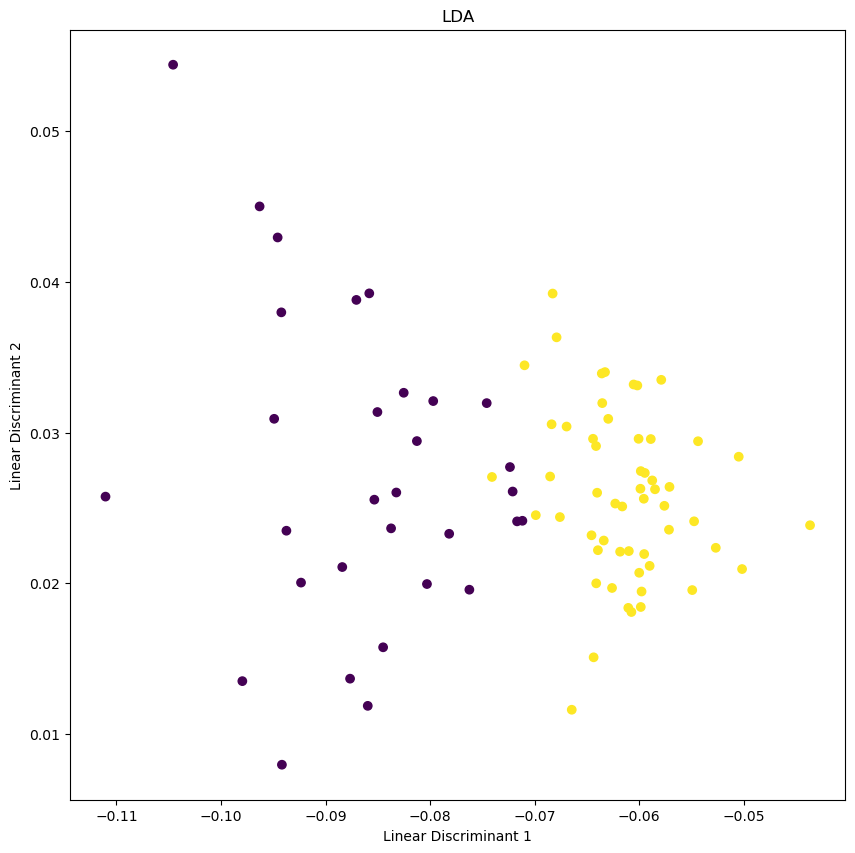

In [61]:
lda_model = LDA(n_components=X_train.shape[1])
lda_model.fit(X_train, y_train)
y_pred = lda_model.transform(X_test)

print("LDA shape: ", lda_model.transformed_X.shape)
# plot 
plt.figure(figsize=(10, 10))
plt.scatter(lda_model.transformed_X[:, 0], lda_model.transformed_X[:, 1], c=test['target'])
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA')
plt.show()

## (c)
Una vez que haya desarrollado todos los modelos y este satisfecho con la performance de cada uno, evalúe las métricas de performance antes mencionadas para cada uno de los clasificadores desarrollados, mediante validación cruzada con 5 folds (en este caso, se deben juntar los conjuntos de entrenamiento y validación, y hacer validación cruzada sobre estos) y mediante evaluación sobre el test set.
Comparar los resultados con las métricas reportadas en el inciso anterior, y analizar cualquier diferencia que se observe. En el caso de las métricas escalares, arme una tabla que muestre las métricas evaluadas de las tres maneras distintas (validación, test y validación cruzada). En el caso de las curvas AUC-ROC, hacer un gráfico mostrando las distintas curvas.